<a href="https://colab.research.google.com/github/Skot1X/ranhdzphytone/blob/main/DZ10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

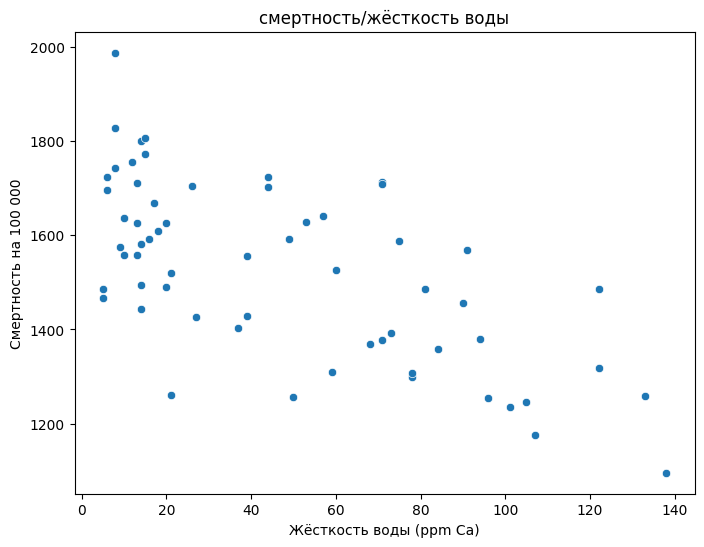

Корреляция Пирсона: -0.655
Корреляция Спирмена: -0.632
Коэффициент регрессии (наклон): -3.226
Свободный член (intercept): 1676.356
Коэффициент детерминации R^2: 0.429


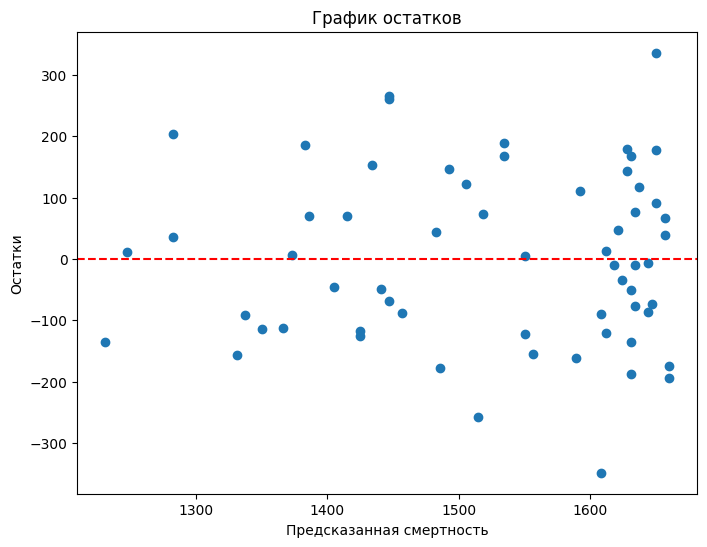

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


data = pd.read_csv("water.csv")
#data = pd.read_csv("water.csv").head(15)

plt.figure(figsize=(8,6))
sns.scatterplot(x='hardness', y='mortality', data=data)
plt.xlabel("Жёсткость воды (ppm Ca)")
plt.ylabel("Смертность на 100 000")
plt.title("смертность/жёсткость воды")
plt.show()


pearson_corr, _ = pearsonr(data['hardness'], data['mortality'])
spearman_corr, _ = spearmanr(data['hardness'], data['mortality'])
print(f"Корреляция Пирсона: {pearson_corr:.3f}")
print(f"Корреляция Спирмена: {spearman_corr:.3f}")


X = data[['hardness']]
y = data['mortality']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Коэффициент регрессии (наклон): {model.coef_[0]:.3f}")
print(f"Свободный член (intercept): {model.intercept_:.3f}")


r2 = r2_score(y, y_pred)
print(f"Коэффициент детерминации R^2: {r2:.3f}")


residuals = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанная смертность")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

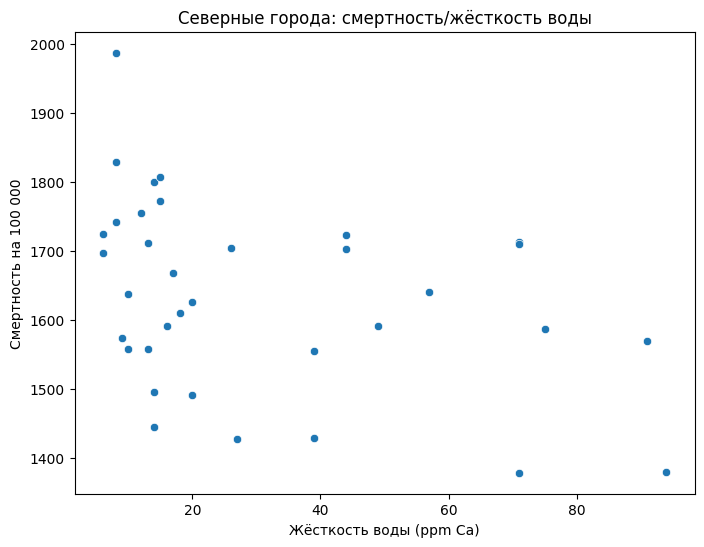

Корреляция Пирсона: -0.369
Корреляция Спирмена: -0.404
Коэффициент регрессии (наклон): -1.931
Свободный член (intercept): 1692.313
Коэффициент детерминации R^2: 0.136


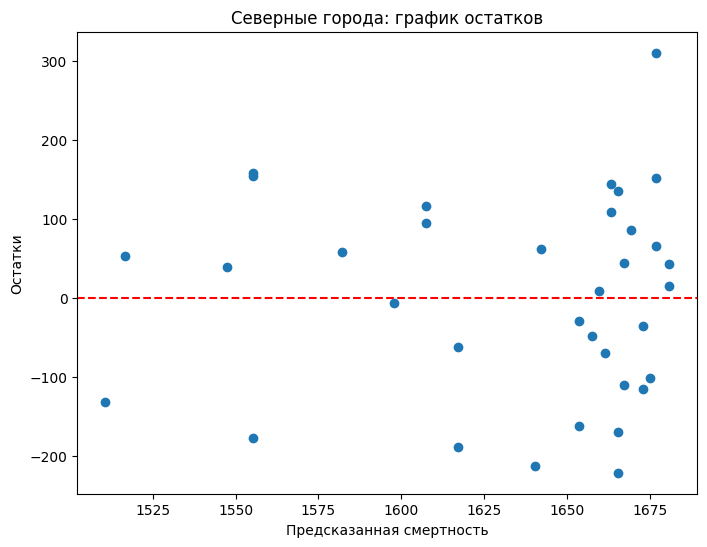

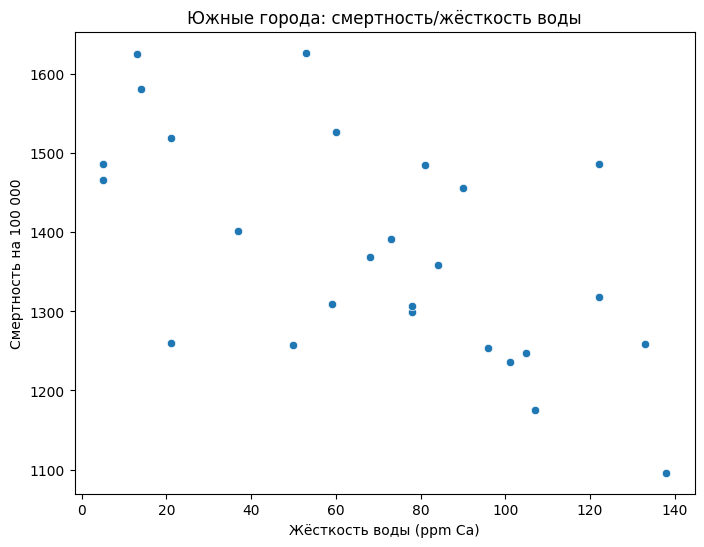

Корреляция Пирсона: -0.602
Корреляция Спирмена: -0.596
Коэффициент регрессии (наклон): -2.093
Свободный член (intercept): 1522.815
Коэффициент детерминации R^2: 0.363


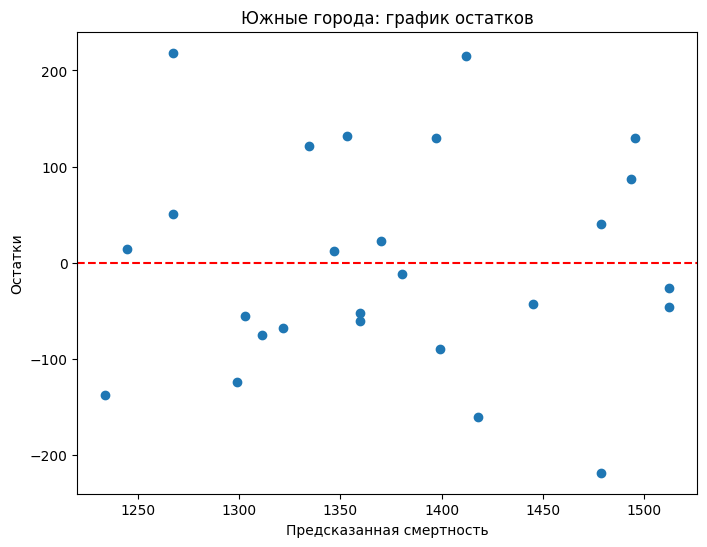

In [6]:

north = data[data['location'] == 'North']
south = data[data['location'] == 'South']

def analyze_group(df, region_name):

    plt.figure(figsize=(8,6))
    sns.scatterplot(x='hardness', y='mortality', data=df)
    plt.xlabel("Жёсткость воды (ppm Ca)")
    plt.ylabel("Смертность на 100 000")
    plt.title(f"{region_name}: смертность/жёсткость воды")
    plt.show()



    pearson_corr, _ = pearsonr(df['hardness'], df['mortality'])
    spearman_corr, _ = spearmanr(df['hardness'], df['mortality'])
    print(f"Корреляция Пирсона: {pearson_corr:.3f}")
    print(f"Корреляция Спирмена: {spearman_corr:.3f}")


    X = df[['hardness']]
    y = df['mortality']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)



    print(f"Коэффициент регрессии (наклон): {model.coef_[0]:.3f}")
    print(f"Свободный член (intercept): {model.intercept_:.3f}")

    r2 = r2_score(y, y_pred)
    print(f"Коэффициент детерминации R^2: {r2:.3f}")


    residuals = y - y_pred
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Предсказанная смертность")
    plt.ylabel("Остатки")
    plt.title(f"{region_name}: график остатков")
    plt.show()

analyze_group(north, "Северные города")

analyze_group(south, "Южные города")